# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Описание данных  
children — количество детей в семье  
days_employed — общий трудовой стаж в днях  
dob_years — возраст клиента в годах  
education — уровень образования клиента  
education_id — идентификатор уровня образования  
family_status — семейное положение  
family_status_id — идентификатор семейного положения  
gender — пол клиента  
income_type — тип занятости  
debt — имел ли задолженность по возврату кредитов  
total_income — ежемесячный доход  
purpose — цель получения кредита  

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# по группировки дети посмотрим общее количество в каждой группе, всего из них с задолженностью и %

children_debt = data.groupby('children')['debt'].agg(['count', 'sum'])
children_debt['percent'] = round(children_debt['sum']/children_debt['count']*100,1)
children_debt

,count,sum,percent
children,,,
0,14091,1063,7.5
1,4808,444,9.2
2,2052,194,9.5
3,330,27,8.2
4,41,4,9.8
5,9,0,0.0


Я бы сказал, что зависимость прослеживается: Чем больше детей, тем выше вероятность невозврата.  
Выбиваются из картины семьи с 5-ю детьми. Но их в выборке очень мало.  
Попробуем разбить на 4 группы - "без детей", "1 ребенок", "2 ребенка", "3 и более детей"


In [23]:
def child_cat(child):
    if child == 0:
        return "без детей"
    elif child == 1:
        return "1 ребенок"
    elif child == 2:
        return "2 ребенка"
    return "3 и более детей"

data['child_cat'] = data['children'].apply(child_cat)

children_debt = data.groupby('child_cat')['debt'].agg(['count', 'sum'])
children_debt['percent'] = round(children_debt['sum']/children_debt['count']*100,1)
children_debt

,count,sum,percent
child_cat,,,
1 ребенок,4808,444,9.2
2 ребенка,2052,194,9.5
3 и более детей,380,31,8.2
без детей,14091,1063,7.5


In [24]:
# Доля многодетных в выборке
children_debt.loc['3 и более детей']['count']/children_debt['count'].sum()

0.017814448455299798

**Вывод:**  
В общем можно сделать вывод, что с детьми вероятность задолженности выше. Возможно даже есть прямая корреляция между задолженностью и количеством детей, но выборка несбалансированна, так как многодетных не так много.
При дальнейшем построении модели ml я бы попробовал два варианта: есть дети (1,0). И разбивку по категорииям (0, 1, 2, 3 и более) или (0, 1, 2 и более) 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
family_st_debt = data.groupby('family_status')['debt'].agg(['count', 'sum'])
family_st_debt['percent'] = round(family_st_debt['sum']/family_st_debt['count']*100,1)
family_st_debt

,count,sum,percent
family_status,,,
Не женат / не замужем,2796,273,9.8
в разводе,1189,84,7.1
вдовец / вдова,951,63,6.6
гражданский брак,4134,385,9.3
женат / замужем,12261,927,7.6


In [26]:
#На первый взгляд корреляция не просматривается. Да и категории условные... Сделаем признак 'married' женат/за мужем (1 - да, 0 - нет)
def family_to_cat(status):
    if status == 'женат / замужем' or status == "гражданский брак":
        return 1
    return 0

data['married'] = data['family_status'].apply(family_to_cat)

family_st_debt = data.groupby('married')['debt'].agg(['count', 'sum'])
family_st_debt['percent'] = round(family_st_debt['sum']/family_st_debt['count']*100,1)
family_st_debt

,count,sum,percent
married,,,
0,4936,420,8.5
1,16395,1312,8.0


**Вывод:**  
Исходя из полученных данных, можно сказать, что в целом не женатые/замужние относятся к более рисковой группе 

Факультативно, я бы еще посмотрел другие группировки типа:  
- женат, мужчина, с детьми  
- женат, мужчина, без детей  
- женат, женщина, с детьми  
- женат, женщина, без детей  
- не женат, мужчина, с детьми  
- не женат, мужчина, без детей  
- не женат, женщина, с детьми  
- не женат, женщина, без детей 

In [27]:
# Факультативно
# Сделаем столбец с детьми есть/нет
data['child_y_n'] = data['children'].apply(lambda x: 0 if x == 0 else 1)
# посмтотрим на gender
data['gender'].value_counts()

F      14092
M       7238
XNA        1
Name: gender, dtype: int64

In [28]:
# уберем "неопределившегося"
data = data[~(data['gender'] == 'XNA')]

dop_grouped = data.groupby(['married', 'gender', 'child_y_n'])['debt'].agg(['count','sum'])
dop_grouped['percent'] = round(dop_grouped['sum']/dop_grouped['count']*100,1)
dop_grouped

count  sum  percent
married gender child_y_n                     
0       F      0           2766  169      6.1
               1            784   62      7.9
        M      0           1127  149     13.2
               1            259   40     15.4
1       F      0           6754  423      6.3
               1           3788  335      8.8
        M      0           3443  322      9.4
               1           2409  232      9.6

**Вывод 2:**  
В общем из факультативной таблички я бы сказал следующее:  
- Женатые мужчины более надежные клиенты, чем не женатые
- Женщины наоборот. Незамужние более надежны, чем замужние
- У женщин вероятность невозврата меньше, чем у мужчин  (у женщин без детей вероятность невозврата еще меньше)  
- Самый высокий невозврат у неженатых мужчин (с детьми  еще выше чем без)  
- Наличие детей увеличивает веротность невозврата  

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# посмотрим на доход
pd.options.display.float_format = '{:20,.2f}'.format
data['total_income'].describe()

count              21,330.00
mean              165,340.94
std                98,315.94
min                20,667.00
25%               107,503.00
50%               142,594.00
75%               195,836.75
max             2,265,604.00
Name: total_income, dtype: float64

<AxesSubplot:>

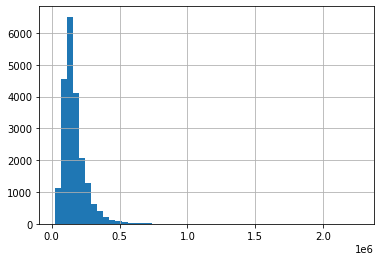

In [30]:
# Размах очень приличный, от 20тыс. до 2.2 млн. При этом медиана и квартили не так далеко друг от друга.

data['total_income'].hist(bins=50)

<AxesSubplot:>

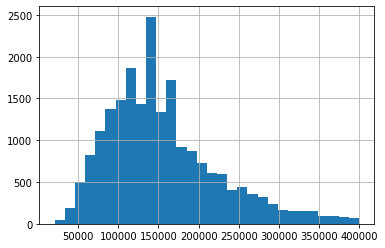

In [31]:
# видим справа вытянутый хвост, посмотрим без него
data[data['total_income']<400000]['total_income'].hist(bins=30)

<AxesSubplot:>

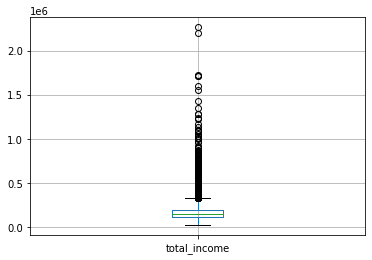

In [32]:
# имеем практически нормальное распределение со смещением вправо (среднее будет существенно больше медианы)

# посмотрим боксплот
data.boxplot('total_income')

In [33]:
# Визуально "выбросы" по межквартильному расстоянию показывают приличное кол-во богатых клиентов.

# интересно количество "богачей"
data[data['total_income']>400000]['total_income'].count()

528

In [34]:
# Сделаем свою группировку: разобьем на четыре группы [0, 1 квартиль] - 'низкий', [1 квартиль, 3 квартиль] - 'средний', 
# [3 квартиль, 400000] - 'высокий', [400000,] - 'богатые'
q1 = data['total_income'].quantile(0.25)
q2 = data['total_income'].median()
q3 = data['total_income'].quantile(0.75)



def rich_cat(income):
    if income < q1:
        return "бедные"
    elif q1 <= income < q3:
        return 'средний класс'
    elif q3 <= income < 400000:
        return 'хороший доход'
    return 'богачи'


data['income_cat'] = data['total_income'].apply(rich_cat)

income_grouped = data.groupby('income_cat')['debt'].agg(['count','sum'])
income_grouped['percent'] = round(income_grouped['sum']/income_grouped['count']*100,1)
income_grouped.sort_values('percent', ascending=False)

,count,sum,percent
income_cat,,,
средний класс,10664,924,8.70
бедные,5333,427,8.00
хороший доход,4805,350,7.30
богачи,528,31,5.90


In [35]:
# Сравним с выборкой по категориям, предложенным проектом
income_grouped = data.groupby('total_income_category')['debt'].agg(['count','sum'])
income_grouped['percent'] = round(income_grouped['sum']/income_grouped['count']*100,1)
income_grouped.sort_values('total_income_category', ascending=False)

,count,sum,percent
total_income_category,,,
E,22,2,9.10
D,349,21,6.00
C,15921,1353,8.50
B,5013,354,7.10
A,25,2,8.00



**Вывод:**  
Самый рисковый - средний класс. Бедные так же имеют больше вероятность не вернуть кредит.
Выше среднего класса - менее рискованные клиенты. С доходом выше 400000 - самый низкий процент должников.
Хотя если посмотреть миллионеров из группировки, предложенной в данном проекте, у них процент невозврата - довольно высокий (но тут в выборку попадают по 20-25 человек, может быть не репрезентативно) 
  

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose_debt = data.groupby('purpose_category')['debt'].agg(['count', 'sum'])
purpose_debt['percent'] = round(purpose_debt['sum']/purpose_debt['count']*100,1)
purpose_debt

,count,sum,percent
purpose_category,,,
операции с автомобилем,4279,400,9.30
операции с недвижимостью,10750,780,7.30
получение образования,3988,369,9.30
проведение свадьбы,2313,183,7.90


**Вывод:**  
Здесь дополнительные группировки на ум не приходят (единственное поковырять в доп группировке с детьми/статусом/ и т.д.).  
Но на первый взгляд можем сказать:  
- Операции с недвижимостью самые надежные (так как, думаю, недвижимость в залоге)
- Почему на свадьбу ниже вероятность невозврата ниже (чем например на авто), не понимаю, он по сути потребительский.
- Более высокий риск невозврата за учебу и за авто.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*  
Из-за ошибки: технической или человеческой.  
- Технические. Парсим сайт по определенным полям, они могут быть незаполненными. В какой то момент может соединение прирваться и т.д.
- Человеческая. Если есть не заполнять необязательные поля - то многие их не заполняют.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.  

*Ответ:*  
Если касательно данного кейса, где есть возможно посмотреть медианное значение по разным группировкам, то - это лучший выбор, потому что медиана нечувствительна к выбросу.

In [37]:
data.groupby('income_type')['total_income'].agg(['count', 'median'])

,count,median
income_type,,
безработный,2,131339
в декрете,1,53829
госслужащий,1451,150447
компаньон,5046,172357
пенсионер,3812,118514
предприниматель,2,499163
сотрудник,11015,142594
студент,1,98201


### Шаг 4: общий вывод.


В целом можно сказать, что представленные данные хорошие, но немного "сырые". Нам пришлось обработать пропуски, удалить дубликаты и выбросы. Изменить категоризацию некоторых признаков.
При анализе данных были выявлены зависимости между вероятностью невозврата кредита и некоторыми признаками:  
- children — количество детей в семье (Наличие детей в целом увеливает риск невозврата)
- family_status — семейное положение (не женатые/замужние более рисковая группа)
- gender — пол клиента  (мужчины более рисковая группа)
- total_income - (есть зависимость от величины дохода, богатые - менее рисковые, чем бедные и средний класс)
- purpose — цель получения кредита (так же выявили корреляцию с целевой переменной)

Остальные признаки не исследовали на корреляцию с целевой переменной, так как не стояла такая задача в проекте.

Как рекомендации банку, я бы посоветовал:
- Улучшить сбор данных (разобраться, что стало причиной дубликатов, пропусков и выбросов (аномальных значений). Поставить защиту при вводе информации (например не должно быть кол-во детей отрицательным)
- Построить модель бинарной классификации с использование данных признаков, так как прослеживается корреляция между целевой переменной и исследуемыми признаками.
- Обратить внимание на самого рискованного клиента (неженатых мужчин с детьми, приобретающих автомобиль и низким уровнем дохода) и самого лояльного - незамужних женщин без детей:

В общем я готов довести данный проект до ума, совместно с инженерами доработать ETL процессы,
рассмотереть различные модели машинного обучения бинарного классификатора или регресии для модели банковского скоринга, и задеплоить новую модель в продакшн )))  
На какой адрес выслать резюме? )) 
